In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import sklearn.cluster as cluster
from matplotlib import pyplot as plt
import seaborn as sns
# magic incantation to help matplotlib work with our jupyter notebook
%matplotlib inline 

Для начала считываем данные о дифференциальной экспрессии генов в мозге мышей:
https://tabula-muris.ds.czbiohub.org/

In [3]:
scaledcounts = pd.read_csv("C:/Users/57662/Downloads/brain_counts.csv")

In [2]:
scaledcounts = pd.read_csv("/home/rita/Downloads/brain_counts.csv")

In [3]:
scaledcounts.head()

,Unnamed: 0,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
0,A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,54,0
1,A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A1.MAA000560.3_10_M.1.1,0,348,0,0,0,5,0,0,0,...,0,0,0,0,0,195,0,0,113,0
3,A1.MAA000564.3_10_M.1.1,0,41,36,0,0,24,0,0,0,...,0,0,0,0,125,0,1,0,0,0
4,A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,...,0,0,0,81,0,0,0,0,0,0


Для определения числа кластеров воспользуемся elbow методом: Обучаем модели кластеризации k средних для разного количества кластеров и строим зависимость суммы квадратов расстояний от каждого элемента кластера до соответствующего центроида от колличества кластеров и находим точку изгиба графика, при этом колонку с кодовым именем нужно убрать - она не задает координату вектора.

In [4]:
K=range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(scaledcounts.drop(['Unnamed: 0'], axis=1))
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [5]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,2.750228e+14
1,2,1.372840e+14
2,3,8.236051e+13
3,4,5.845748e+13
4,5,4.647305e+13
5,6,4.023857e+13
6,7,3.644612e+13
7,8,3.341341e+13
8,9,3.127723e+13
9,10,2.922931e+13


/home/rita/.local/lib/python3.8/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

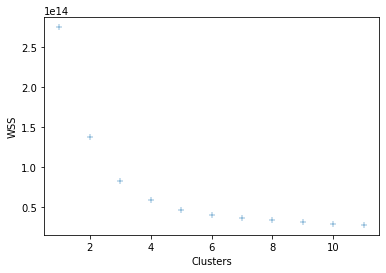

In [6]:
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")

Четкого угла на гравфике не видно, но для начала можно взять n_clusters = 7.

In [7]:
km = KMeans(n_clusters = 7)
y_predict = km.fit_predict(scaledcounts.drop(['Unnamed: 0'], axis=1))
scaledcounts['cluster'] = y_predict
scaledcounts.head()

,Unnamed: 0,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,...,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene,cluster
0,A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,54,0,0
1,A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A1.MAA000560.3_10_M.1.1,0,348,0,0,0,5,0,0,0,...,0,0,0,0,195,0,0,113,0,4
3,A1.MAA000564.3_10_M.1.1,0,41,36,0,0,24,0,0,0,...,0,0,0,125,0,1,0,0,0,0
4,A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,...,0,0,81,0,0,0,0,0,0,4


Попробуем визуализовать результать с помощью метода понижения размерности (Principal Component Analysis):

[0.90644015 0.04499483]


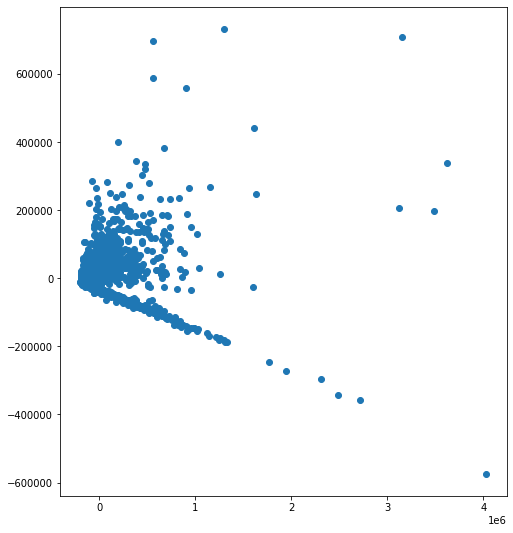

In [8]:
pca = PCA(n_components = 2)
pca.fit(scaledcounts.drop(['Unnamed: 0'], axis=1))

print(pca.explained_variance_ratio_)

x_pca = pca.transform(scaledcounts.drop(['Unnamed: 0'], axis=1))
plt.figure(figsize=(8,9))
plt.scatter(x_pca[:,0],x_pca[:,1],)

Видно, что определить колличество кластеров без elbow метода было невозможно даже примерно. Тепрерь нужно покрасить точки и посмотреть, разделились ли точки по цвету

Добавляем столбец номеров кластеров к столбцам PC1 и PC2:

In [9]:
import numpy as np
np.insert(x_pca,2,y_predict,axis=1)

array([[-1.77407919e+05, -1.26224805e+04,  0.00000000e+00],
       [-1.57844598e+05, -1.87540143e+04,  0.00000000e+00],
       [ 1.60008048e+04,  8.16227401e+04,  4.00000000e+00],
       ...,
       [-1.73973674e+05, -1.33934616e+04,  0.00000000e+00],
       [-3.79441358e+04,  1.48549154e+04,  4.00000000e+00],
       [-1.78065952e+05, -1.30685856e+04,  0.00000000e+00]])

Преобразуем в более удобный дата фрейм:

In [10]:
df = pd.DataFrame(np.insert(x_pca,2,y_predict,axis=1)).rename(columns={2:'cluster'})
df

,0,1,cluster
0,-177407.918590,-12622.480524,0.0
1,-157844.597527,-18754.014283,0.0
2,16000.804821,81622.740096,4.0
3,-131256.837643,-18220.629935,0.0
4,-71464.649824,-25776.032995,4.0
...,...,...,...
3396,-93902.057099,-21945.110508,0.0
3397,-119573.873556,-6535.428475,0.0
3398,-173973.674045,-13393.461568,0.0
3399,-37944.135805,14854.915437,4.0


Рисуем покрашенные точки:

<Figure size 576x648 with 0 Axes>

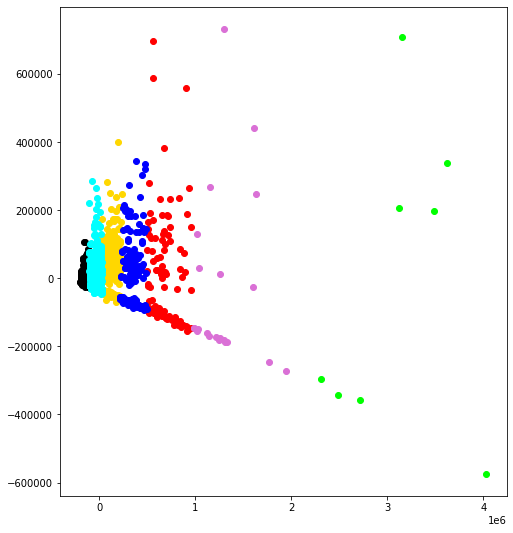

In [11]:
plt.figure(figsize=(8,9))
colors = ['black','red', 'gold', 'lime', 'cyan', 'orchid', 'b']

plt.figure(figsize=(8,9))
for i in range(7):
    sub_df = df.loc[df['cluster'] == i]
    plt.scatter(sub_df[0],sub_df[1], c = colors[i])

Видно разделение точек по кластерам, разброс зеленых и синих точек может быть побочным эффектом понижения размерности данных.

Так просто с PCA у нас ничего хорошего не получается, а значит надо вернуться к принципам пайплайна в биоинформатике. Обычно удаляются гены, в которых прочтения можно считать вообще побочными, то есть все гены, в которых вообще не было прочтений (зачем нам это анализировать) и, например, для которых ни в одной клетке не было даже 5 прочтений (в такой ситуации это могло быть результатом не экспрессии гена, а артефактом картирования прочтений на геном)

In [13]:
scaledcounts.shape

(3401, 23435)

In [3]:
scaledcounts = scaledcounts.set_index("Unnamed: 0")

In [4]:
scaledcounts.index.names = [None]

In [5]:
scaledcounts.shape

(3401, 23433)

In [14]:
count_matrix = scaledcounts.iloc[:, :23433]

Потребуем чтобы хотя бы для 100 (из 3401) клеточных линий у нас было не 0 прочтений

In [15]:
count_matrix = count_matrix.T[(count_matrix.T > 0).sum(axis=1) >= 100].T

In [20]:
count_matrix

,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B22Rik,0610009D07Rik,0610009L18Rik,0610009O20Rik,...,Zw10,Zwint,Zxda,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,l7Rn6
A1.B003290.3_38_F.1.1,125,16,0,0,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,54
A1.B003728.3_56_F.1.1,0,0,0,0,324,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1.MAA000560.3_10_M.1.1,348,0,0,0,5,0,0,316,0,0,...,0,266,0,0,0,0,0,195,0,113
A1.MAA000564.3_10_M.1.1,41,36,0,0,24,0,14,0,0,3,...,2,0,0,0,0,0,125,0,1,0
A1.MAA000923.3_9_M.1.1,53,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,81,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.MAA000926.3_9_M.1.1,111,0,0,32,55,63,0,12,0,39,...,0,61,0,0,0,0,4,12,64,3
P9.MAA000930.3_8_M.1.1,223,2,0,0,49,0,0,23,0,0,...,0,71,0,0,0,10,1,50,2,0
P9.MAA000932.3_11_M.1.1,135,41,0,0,0,0,0,27,0,8,...,0,0,0,0,19,0,18,0,0,45
P9.MAA000935.3_8_M.1.1,129,54,0,0,209,0,0,59,0,66,...,0,0,0,0,0,1,0,0,0,57


Мы отфильтровали почти половину генов, будет намного быстрее дальше работать


Для того, чтобы высокоэкспрессируемые гены вносили такой же вклад в PCA как и низкоэкспрессируемые, можно провести логарифмическое преобразование

In [27]:
import numpy as np
cmtrx = np.log2(count_matrix + 1)

In [33]:
cmtrx

,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B22Rik,0610009D07Rik,0610009L18Rik,0610009O20Rik,...,Zw10,Zwint,Zxda,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,l7Rn6
A1.B003290.3_38_F.1.1,6.977280,4.087463,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,3.169925,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.781360
A1.B003728.3_56_F.1.1,0.000000,0.000000,0.0,0.000000,8.344296,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A1.MAA000560.3_10_M.1.1,8.447083,0.000000,0.0,0.000000,2.584963,0.0,0.000000,8.308339,0.0,0.000000,...,0.000000,8.060696,0.0,0.0,0.000000,0.000000,0.000000,7.614710,0.000000,6.832890
A1.MAA000564.3_10_M.1.1,5.392317,5.209453,0.0,0.000000,4.643856,0.0,3.906891,0.000000,0.0,2.000000,...,1.584963,0.000000,0.0,0.0,0.000000,0.000000,6.977280,0.000000,1.000000,0.000000
A1.MAA000923.3_9_M.1.1,5.754888,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,2.000000,...,0.000000,0.000000,0.0,0.0,0.000000,6.357552,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.MAA000926.3_9_M.1.1,6.807355,0.000000,0.0,5.044394,5.807355,6.0,0.000000,3.700440,0.0,5.321928,...,0.000000,5.954196,0.0,0.0,0.000000,0.000000,2.321928,3.700440,6.022368,2.000000
P9.MAA000930.3_8_M.1.1,7.807355,1.584963,0.0,0.000000,5.643856,0.0,0.000000,4.584963,0.0,0.000000,...,0.000000,6.169925,0.0,0.0,0.000000,3.459432,1.000000,5.672425,1.584963,0.000000
P9.MAA000932.3_11_M.1.1,7.087463,5.392317,0.0,0.000000,0.000000,0.0,0.000000,4.807355,0.0,3.169925,...,0.000000,0.000000,0.0,0.0,4.321928,0.000000,4.247928,0.000000,0.000000,5.523562
P9.MAA000935.3_8_M.1.1,7.022368,5.781360,0.0,0.000000,7.714246,0.0,0.000000,5.906891,0.0,6.066089,...,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,5.857981


[0.11650739 0.06425546]


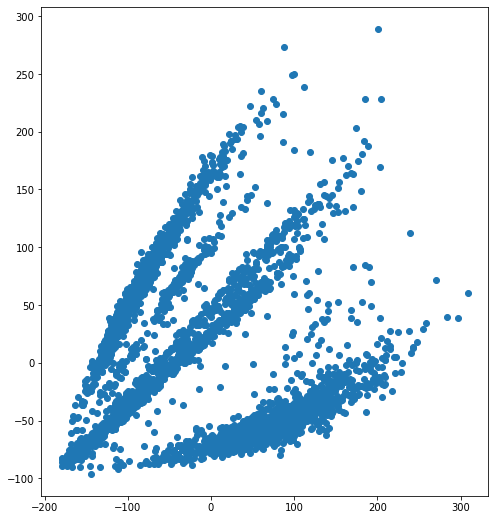

In [37]:
pca = PCA(n_components = 2)
pca.fit(cmtrx)

print(pca.explained_variance_ratio_)

y_pca = pca.transform(cmtrx)
plt.figure(figsize=(8,9))
plt.scatter(y_pca[:,0],y_pca[:,1])

Уже намного легче различимы кластеры

Uniform Manifold Approximation and Projection (UMAP) 

In [8]:
import umap
import umap.plot

In [9]:
reducer = umap.UMAP()

In [10]:

mapper = reducer.fit(scaledcounts)

<AxesSubplot:>

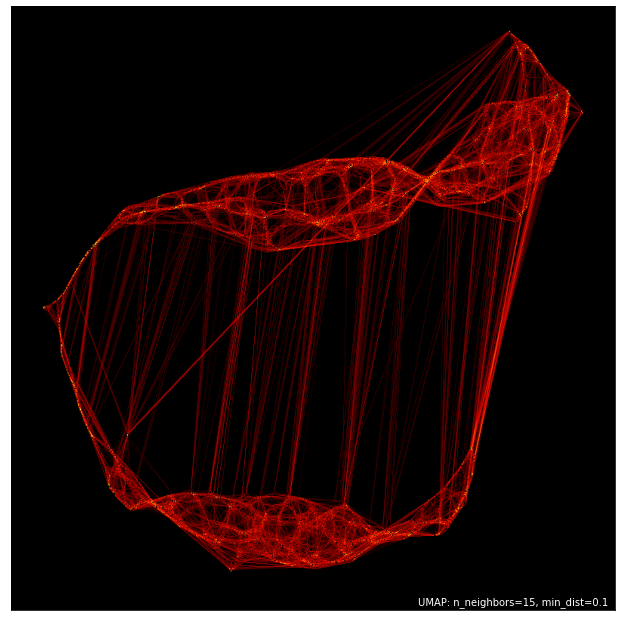

In [16]:
umap.plot.connectivity(mapper, show_points=True, theme = "fire")

красивое, только надо на преобразованных данных еще сделать нормально